# The Capacitated VRP (CVRP)
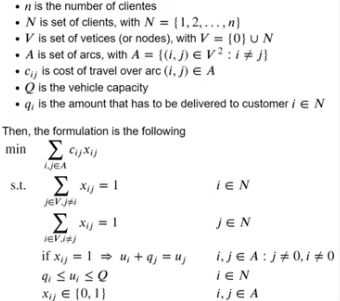

In [11]:
## Let's do the importation
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import *

In [2]:
rnd = np.random
rnd.seed(0)

In [3]:
n = 10 # Number of clients
xc = rnd.rand(n+1)*200 # x coordinates
yc = rnd.rand(n+1)*100 # y coordinates

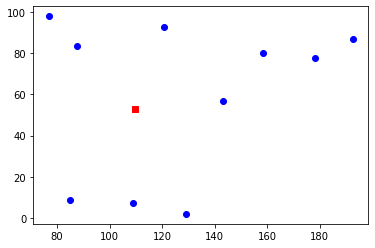

In [4]:
plt.plot(xc[0],yc[0],c="r",marker="s")
plt.scatter(xc[1:],yc[1:],c="b")

In [5]:
N = [i for i in range(1,n+1)] # Set of clients
N

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [6]:
V = [0]+N # Set of all the nodes
V

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [7]:
## Setting up the arcs
A = [(i,j) for i in V for j in V if i != j]
A

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (7, 10),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 9),
 (8, 10),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 10),
 (10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),


In [8]:
## Defining the cost (using euclidean distance)
c = {(i,j): np.hypot(xc[i]-xc[j],yc[i]-yc[j]) for i,j in A}
c

{(0, 1): 33.504686960860795,
 (0, 2): 41.11138629503385,
 (0, 3): 45.79263333713419,
 (0, 4): 50.77555203012287,
 (0, 5): 54.44725732628541,
 (0, 6): 37.647574061136034,
 (0, 7): 72.98056771655875,
 (0, 8): 89.70844922828567,
 (0, 9): 55.82497026893104,
 (0, 10): 55.59374885917202,
 (1, 0): 33.504686960860795,
 (1, 2): 42.23764921128613,
 (1, 3): 60.2523224726414,
 (1, 4): 75.58102299795816,
 (1, 5): 56.50848025794605,
 (1, 6): 61.502187540784085,
 (1, 7): 41.094312512967974,
 (1, 8): 58.14985245467972,
 (1, 9): 78.02546809638228,
 (1, 10): 27.720843893358516,
 (2, 0): 41.11138629503385,
 (2, 1): 42.23764921128613,
 (2, 3): 86.23654979493304,
 (2, 4): 91.17823243082672,
 (2, 5): 90.94783124977752,
 (2, 6): 34.318704181986625,
 (2, 7): 59.65272609703002,
 (2, 8): 72.39358384965435,
 (2, 9): 44.18366319713841,
 (2, 10): 39.85130178750766,
 (3, 0): 45.79263333713419,
 (3, 1): 60.2523224726414,
 (3, 2): 86.23654979493304,
 (3, 4): 24.29902805451533,
 (3, 5): 20.831530577252774,
 (3, 6): 79

In [9]:
## Other params
Q = 20
q = {i: rnd.randint(1,10) for i in N}
q

{1: 4, 2: 4, 3: 4, 4: 8, 5: 1, 6: 2, 7: 1, 8: 5, 9: 8, 10: 4}

# Modelling

In [12]:
## Call the model
mdl = Model("CVRP")

Academic license - for non-commercial use only - expires 2021-04-09
Using license file C:\Users\57316\gurobi.lic


In [14]:
## Defining the variable
x = mdl.addVars(A,vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

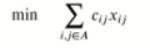

In [15]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(c[i,j]*x[i,j] for i,j in A))

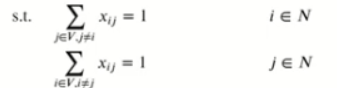

In [19]:
mdl.addConstrs(quicksum(x[i,j] for j in V if j!=i) ==1 for i in N)
mdl.addConstrs(quicksum(x[i,j] for i in V if i!=j) ==1 for j in N);

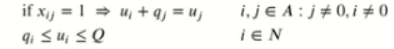

In [25]:
mdl.addConstrs((x[i,j]==1) >> (u[i]+q[j]==u[j]) for i,j in A if i!=0 if j!=0);
mdl.addConstrs(q[i] <= u[i] for i in N)
mdl.addConstrs(Q >= u[i] for i in N);

In [26]:
mdl.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 60 rows, 120 columns and 420 nonzeros
Model fingerprint: 0x6e4afc6b
Model has 270 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve added 159 rows and 12 columns
Presolve time: 0.03s
Presolved: 219 rows, 132 columns, 1327 nonzeros
Variable types: 42 continuous, 90 integer (90 binary)

Root relaxation: objective 3.039835e+02, 38 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  303.98354    0   23          -  303.98354      -     -    0s
H    0     0                    1074.7736522  303.98354  71.7%     -  

## Plotting the result

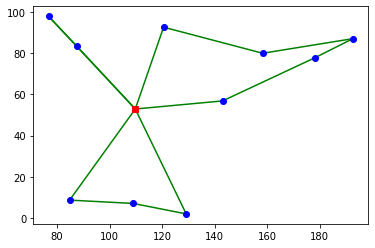

In [27]:
active_arcs = [a for a in A if x[a].x > 0.99]
for i,j in active_arcs:
    plt.plot([xc[i],xc[j]],[yc[i],yc[j]],c="g",zorder=0)
plt.plot(xc[0],yc[0],c="r",marker="s")
plt.scatter(xc[1:],yc[1:],c="b")